In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])

In [7]:
df

,phone_model,phone_generation,phone_size,phone_color,claim,weeks_monday,month,year,month_year
0,apple iphone 11,iphone 11,128gb,black,111,2021-06-28,6,2021,2021-06-01
1,apple iphone 11,iphone 11,128gb,black,319,2021-07-05,7,2021,2021-07-01
2,apple iphone 11,iphone 11,128gb,black,320,2021-07-12,7,2021,2021-07-01
3,apple iphone 11,iphone 11,128gb,black,305,2021-07-19,7,2021,2021-07-01
4,apple iphone 11,iphone 11,128gb,black,269,2021-07-26,7,2021,2021-07-01
...,...,...,...,...,...,...,...,...,...
17874,apple iphone xs max,iphone x,64gb,silver,18,2023-01-16,1,2023,2023-01-01
17875,apple iphone xs max,iphone x,64gb,silver,19,2023-01-23,1,2023,2023-01-01
17876,apple iphone xs max,iphone x,64gb,silver,14,2023-01-30,1,2023,2023-01-01
17877,apple iphone xs max,iphone x,64gb,silver,13,2023-02-06,2,2023,2023-02-01


### iPhone 12 

In [59]:
iphone12_df = df[df['phone_generation'] == 'iphone 12'].reset_index()
iphone12_df = iphone12_df[['weeks_monday', 'claim']]
iphone12_df = iphone12_df.groupby('weeks_monday')['claim'].sum().reset_index()
iphone12_df

,weeks_monday,claim
0,2021-06-28,422
1,2021-07-05,1017
2,2021-07-12,1045
3,2021-07-19,1144
4,2021-07-26,1157
...,...,...
81,2023-01-16,4277
82,2023-01-23,4136
83,2023-01-30,3764
84,2023-02-06,4604


<AxesSubplot:xlabel='weeks_monday'>

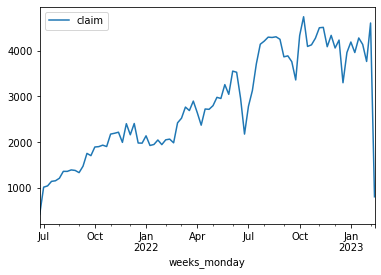

In [60]:
iphone12_df.set_index('weeks_monday', inplace=True)
iphone12_df.index=pd.to_datetime(iphone12_df.index)
iphone12_df.plot()

In [61]:
result=seasonal_decompose(iphone12_df['claim'], model='additive', period=12)

<AxesSubplot:xlabel='weeks_monday'>

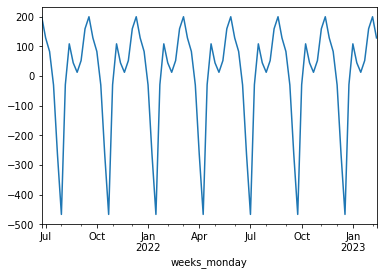

In [62]:
seasonal = result.seasonal.plot()
seasonal

<AxesSubplot:xlabel='weeks_monday'>

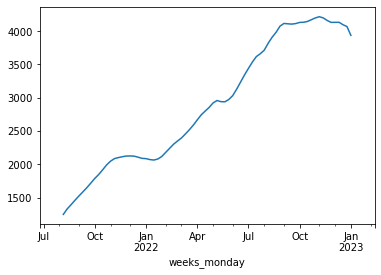

In [63]:
trend = result.trend.plot()
trend

<AxesSubplot:xlabel='weeks_monday'>

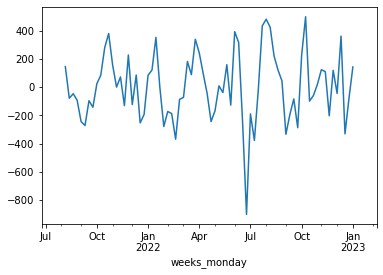

In [64]:
residual = result.resid.plot()
residual

### iPhone 11

In [52]:
iphone11_df = df[df['phone_generation'] == 'iphone 11'].reset_index()
iphone11_df = iphone11_df[['weeks_monday', 'claim']]
iphone11_df = iphone11_df.groupby('weeks_monday')['claim'].sum().reset_index()
iphone11_df

,weeks_monday,claim
0,2021-06-28,1499
1,2021-07-05,4068
2,2021-07-12,3753
3,2021-07-19,3664
4,2021-07-26,3583
...,...,...
81,2023-01-16,1856
82,2023-01-23,1751
83,2023-01-30,1536
84,2023-02-06,2157


<AxesSubplot:xlabel='weeks_monday'>

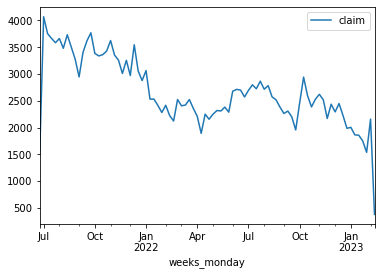

In [53]:
iphone11_df.set_index('weeks_monday', inplace=True)
iphone11_df.index=pd.to_datetime(iphone11_df.index)
iphone11_df.plot()

In [54]:
result=seasonal_decompose(iphone11_df['claim'], model='additive', period=12)

<AxesSubplot:xlabel='weeks_monday'>

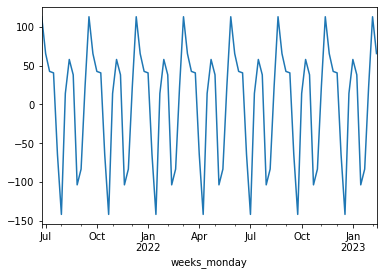

In [55]:
seasonal = result.seasonal.plot()
seasonal

<AxesSubplot:xlabel='weeks_monday'>

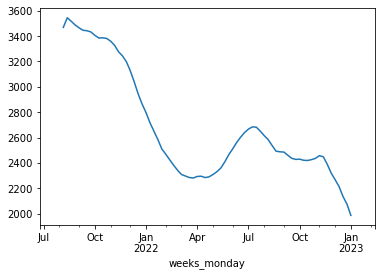

In [57]:
trend = result.trend.plot()
trend

<AxesSubplot:xlabel='weeks_monday'>

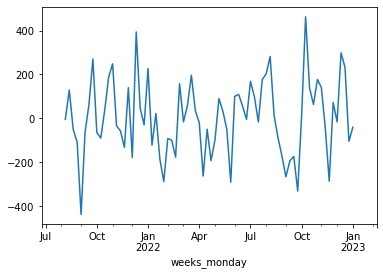

In [58]:
residual = result.resid.plot()
residual 

[]

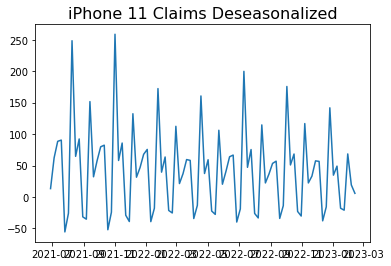

In [71]:
result_add = seasonal_decompose(iphone11_df['claim'], model='additive', period=12)

deseasonalized = iphone11_df['claim'].values / result_add.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('iPhone 11 Claims Deseasonalized', fontsize=16)
plt.plot()

Text(0.5, 1.0, 'iPhone 11 Claims detrended by subtracting the least squares fit')

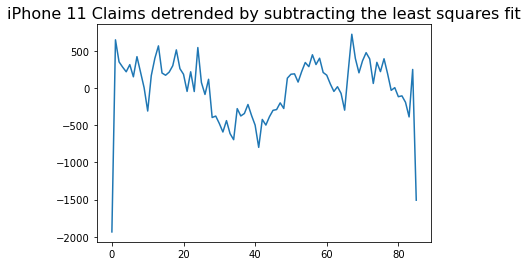

In [72]:
from scipy import signal
detrended = signal.detrend(iphone11_df['claim'].values)
plt.plot(detrended)
plt.title('iPhone 11 Claims detrended by subtracting the least squares fit', fontsize=16)